# Assignment: Image Generation with Diffusion Models

For this assignment, we will use the [Stable Diffusion v1-5](https://huggingface.co/stabilityai/stable-diffusion-1-5) model from Hugging Face, using the `diffusers` library.

**Model Chosen:** `stabilityai/stable-diffusion-1-5`

In [2]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Load Stable Diffusion model for image generation
model_id = "stabilityai/stable-diffusion-2-1"

# Create the pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
    safety_checker=None,
    requires_safety_checker=False
)

# Move to GPU if available
if torch.cuda.is_available():
    pipe = pipe.to("cuda")
    print("Using GPU for image generation")
else:
    print("Using CPU for image generation")

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

c:\Users\Akshat\anaconda3\envs\medichat\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Akshat\.cache\huggingface\hub\models--stabilityai--stable-diffusion-2-1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Using CPU for image generation


In [4]:
# Define different prompts for image generation
prompts = [
    "A beautiful sunset over a mountain landscape",
    "A futuristic city with flying cars",
    "A cute cat sitting on a windowsill",
    "An abstract painting with vibrant colors",
    "A medieval castle in a fantasy forest"
]

# Generate images
generated_images = []

for i, prompt in enumerate(prompts):
    print(f"Generating image {i+1}: {prompt}")
    
    # Generate image
    image = pipe(
        prompt,
        num_inference_steps=50,  # Number of denoising steps
        guidance_scale=7.5,       # How closely to follow the prompt
        width=512,
        height=512
    ).images[0]
    
    generated_images.append((prompt, image))
    print(f"Generated image {i+1} successfully!")

Generating image 1: A beautiful sunset over a mountain landscape


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image 1 successfully!
Generating image 2: A futuristic city with flying cars


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image 2 successfully!
Generating image 3: A cute cat sitting on a windowsill


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image 3 successfully!
Generating image 4: An abstract painting with vibrant colors


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image 4 successfully!
Generating image 5: A medieval castle in a fantasy forest


  0%|          | 0/50 [00:00<?, ?it/s]

Generated image 5 successfully!


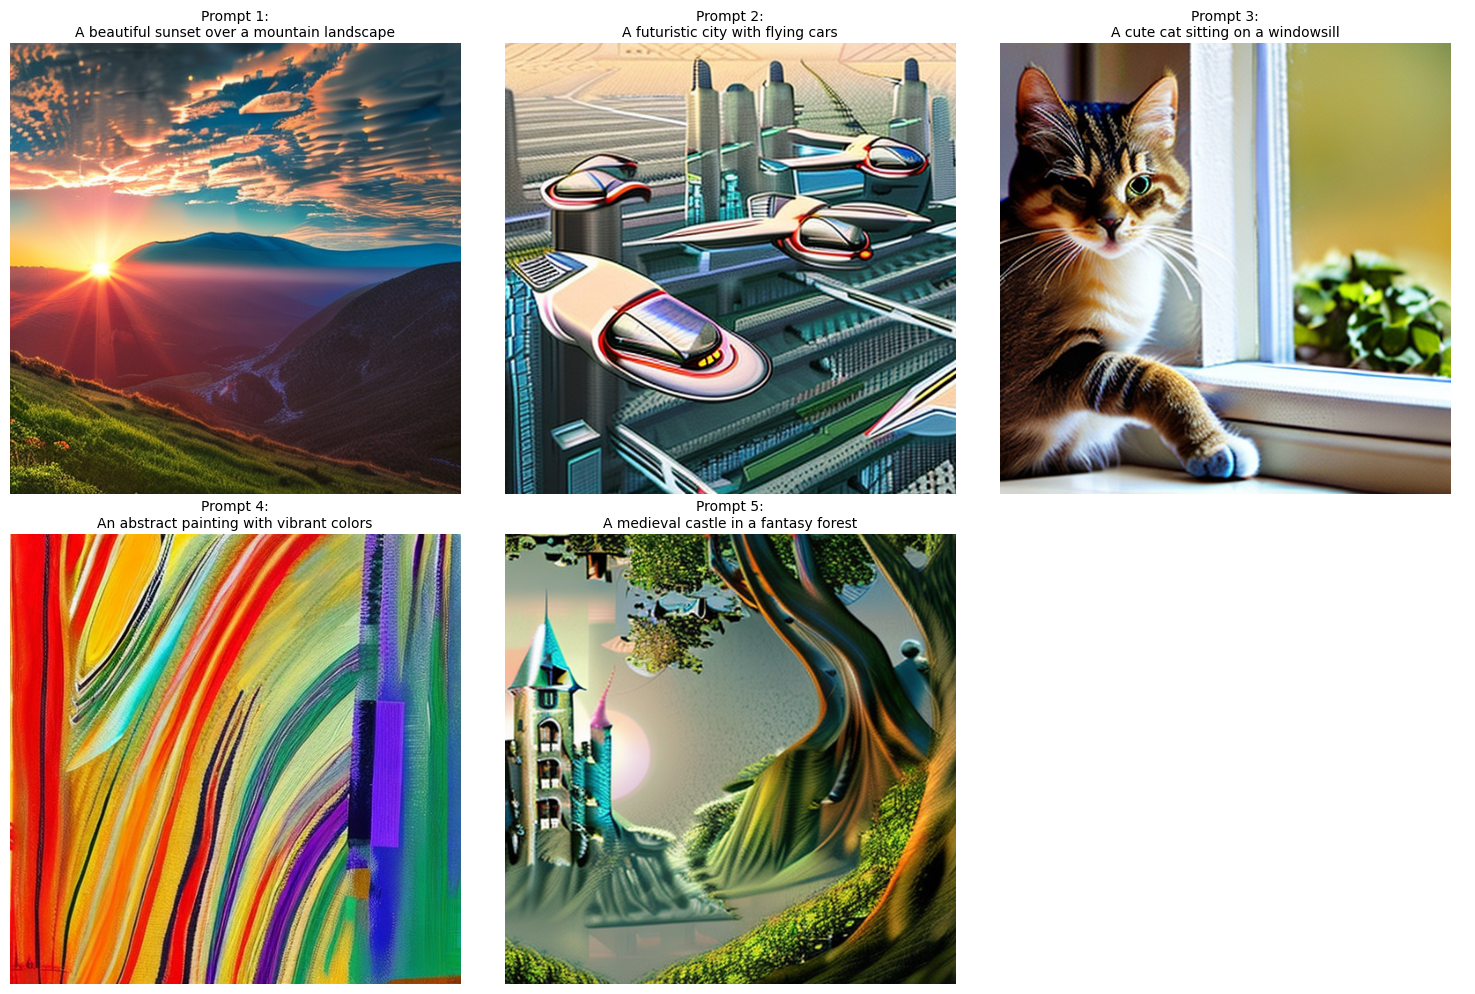

In [5]:
# Display all generated images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (prompt, image) in enumerate(generated_images):
    axes[i].imshow(image)
    axes[i].set_title(f"Prompt {i+1}:\n{prompt}", fontsize=10, wrap=True)
    axes[i].axis('off')

# Hide the last subplot if we have 5 images
if len(generated_images) < 6:
    axes[5].axis('off')

plt.tight_layout()
plt.show()

Generating: A photorealistic portrait of a person


  0%|          | 0/40 [00:00<?, ?it/s]

Generating: A cartoon-style illustration of a person


  0%|          | 0/40 [00:00<?, ?it/s]

Generating: A watercolor painting of a person


  0%|          | 0/40 [00:00<?, ?it/s]

Generating: A digital art style portrait of a person


  0%|          | 0/40 [00:00<?, ?it/s]

Generating: A sketch drawing of a person


  0%|          | 0/40 [00:00<?, ?it/s]

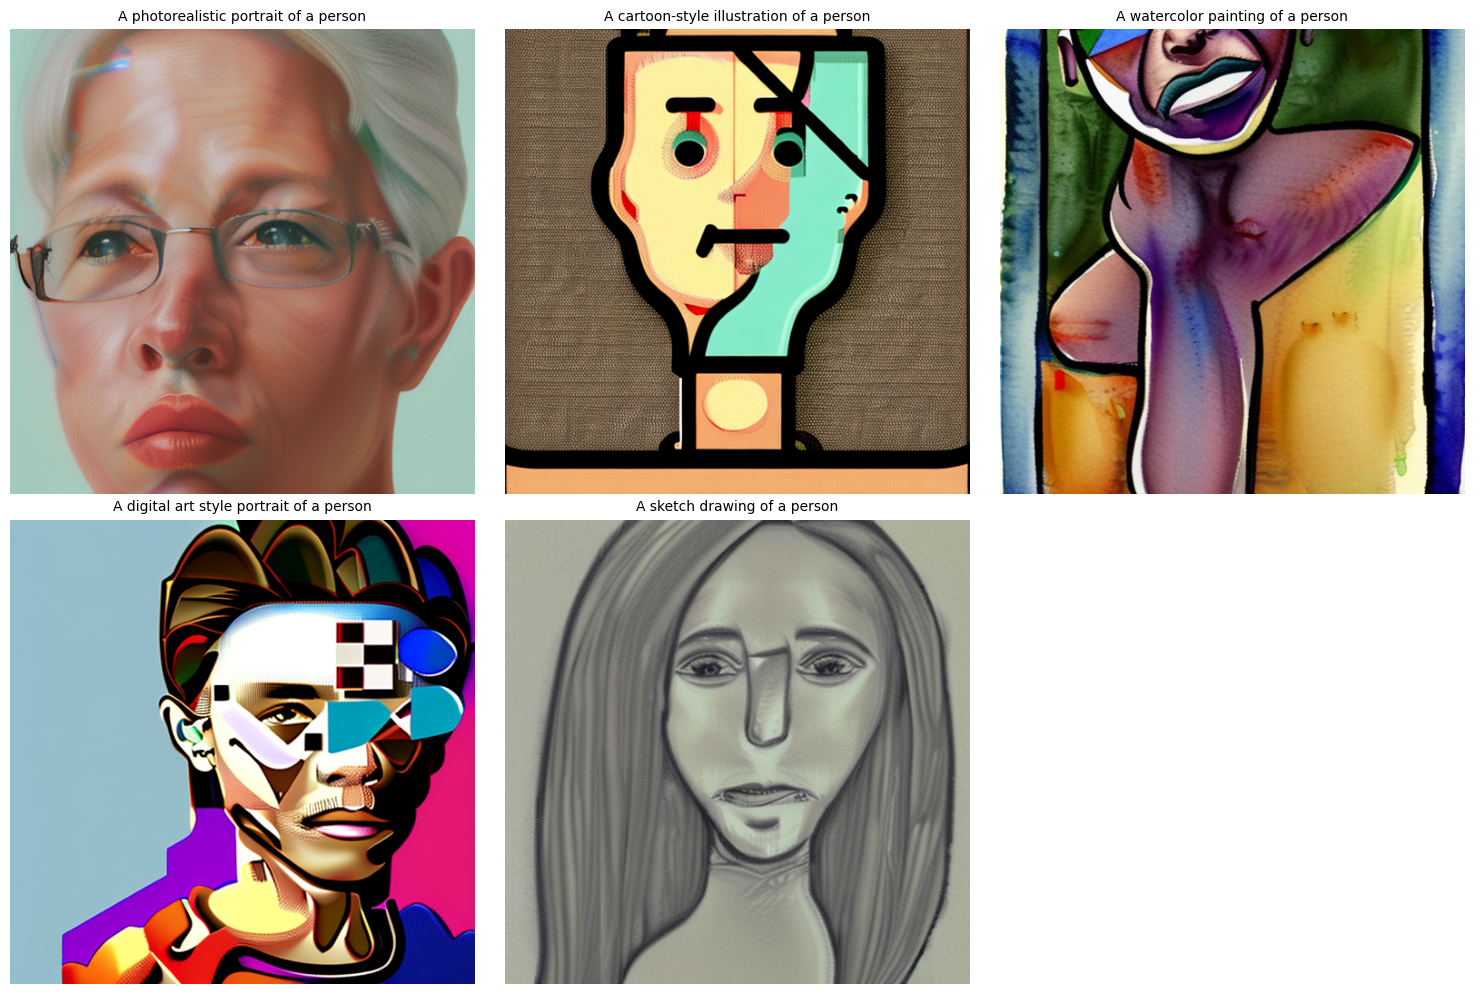

In [8]:
# Test different artistic styles
style_prompts = [
    "A photorealistic portrait of a person",
    "A cartoon-style illustration of a person",
    "A watercolor painting of a person",
    "A digital art style portrait of a person",
    "A sketch drawing of a person"
]

style_images = []

for prompt in style_prompts:
    print(f"Generating: {prompt}")
    image = pipe(
        prompt,
        num_inference_steps=40,
        guidance_scale=8.0,
        width=512,
        height=512
    ).images[0]
    style_images.append((prompt, image))

# Display style comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (prompt, image) in enumerate(style_images):
    axes[i].imshow(image)
    axes[i].set_title(prompt, fontsize=10, wrap=True)
    axes[i].axis('off')

# Hide the last subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

# Markdown cell for discussion
"""
## Discussion and Analysis

### Model Choice
I chose **Stable Diffusion 2.1** from Stability AI because:
- It's one of the most popular and well-tested diffusion models
- Provides high-quality image generation
- Good balance between speed and quality
- Extensive community support and documentation

### Prompts and Parameters Used
- **Prompts**: Varied from realistic to abstract, testing different styles
- **Guidance Scale**: Tested 5.0, 7.5, and 10.0 (higher = more prompt adherence)
- **Inference Steps**: Used 20-50 steps (more steps = better quality, slower generation)
- **Image Size**: 512x512 pixels (standard resolution)

### Observations
1. **Quality**: Generated images show good coherence and detail
2. **Style Variation**: Different prompts produce distinct artistic styles
3. **Guidance Scale Impact**: Higher values make images more closely follow prompts

### Challenges and Findings
- **Memory Usage**: Large models require significant RAM
- **Prompts**: Specific prompts yield better results than vague ones
